# Semestrální projekt 2
vypracovali: Petr Fiedler, Martin Beneš, Tomáš Novotný

#### Načtení knihoven

In [1]:
library(Sleuth2)
#library(performance)
library(ggplot2)
library(cowplot)
library(olsrr)
library(car)
library(lmtest)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: carData

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




#### Načtení datasetu

In [2]:
data("ex1028") # hash 7
df <- ex1028

In [3]:
# úprava příznaku WestAfrica na faktor a náhrada číselných hodnot za slovní ekvivalenty
df$WestAfrica <- factor(df$WestAfrica, levels=c(0,1), labels=c("dry", "wet"))

In [4]:
# odebrání duplicitního příznaku Temperature a ponechání faktorového příznaku ElNino
df$Temperature <- NULL

## Úloha 1

### Popis datasetu:
__Dataset s počtem atlantických tropických bouřek a hurikánů a dalšími meteorologickými ukazateli intenzity hurikánové sezóny z každého roku v letech 1950–1997.__

Dataset obsahuje 48 datových bodů a 7 příznaků.

`Year`: rok

In [5]:
print("Unikátní hodnoty ve sloupci Year:")
print(unique(df$Year))

[1] "Unikátní hodnoty ve sloupci Year:"
 [1] 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
[16] 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
[31] 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
[46] 1995 1996 1997


`ElNino`: faktor se stupni "cold", "neutral" and "warm" udávající teplotu přírodního jevu El Nino

In [6]:
print("Unikátní hodnoty ve sloupci ElNino:")
print(unique(df$ElNino))

[1] "Unikátní hodnoty ve sloupci ElNino:"
[1] cold    warm    neutral
Levels: cold neutral warm


`WestAfrica`: číselný faktor indikující, zda byl rok v západní Africe suchý (0) nebo vlhký (1)

In [7]:
print("Unikátní hodnoty ve sloupci WestAfrica:")
print(unique(df$WestAfrica))

[1] "Unikátní hodnoty ve sloupci WestAfrica:"
[1] wet dry
Levels: dry wet


`Storms`: počet bouřek v daném roce

In [8]:
print("Unikátní hodnoty ve sloupci Storms:")
print(unique(df$Storms))

[1] "Unikátní hodnoty ve sloupci Storms:"
 [1] 13 10  7 14 11 12  8  5  9  6 17  4 19


`Hurricanes`: počet hurikánů v daném roce

In [9]:
print("Unikátní hodnoty ve sloupci Hurricanes:")
print(unique(df$Hurricanes))

[1] "Unikátní hodnoty ve sloupci Hurricanes:"
 [1] 11  8  6  9  4  3  7 12  5  2


`StormIndex`: index celkové intenzity hurikánové sezóny **(vysvětlovaná proměnná)**

In [10]:
print("Unikátní hodnoty ve sloupci StormIndex:")
print(unique(df$StormIndex))

[1] "Unikátní hodnoty ve sloupci StormIndex:"
 [1] 243 121  97 127 198  69  86 140  99 101 222  33 118 168  41 157  65  95  28
[20]  52  76  92  85  46  96 135 114  37  32  77 110  38  48 104  59  62  55 237
[39]  54


##### Prvních pár řádek datasetu

In [11]:
head(df)

,Year,ElNino,WestAfrica,Storms,Hurricanes,StormIndex
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1950,cold,wet,13,11,243
2,1951,warm,dry,10,8,121
3,1952,neutral,wet,7,6,97
4,1953,warm,wet,14,6,121
5,1954,cold,wet,11,8,127
6,1955,cold,wet,12,9,198


### Statistické míry:

U teploty jevu `ElNino` jsou hodnoty __studený__, __neutrální__ a __teplý__ zastoupeny ve sledovaných letech **rovnoměrně**.

Ve zhruba **dvou třetinách** sledovaných let byl v `západní Africe` __suchý__ rok.

**Průměrný** `počet bouřek` ve sledovaných letech je __9,4__ a **medián** je __8,5__, přičemž **nejmenší** počet bouřek je __4__ a **největší** __19__.

U `počtu hurikánů` je **průměr** ve sledovaných letech __5,8__ a **medián** __5,5__, přičemž **nejmenší** počet hurikánů byl __2__ a **největší** počet __12__.

`Bouřkový index` se v datasetu vyskytuje v __rozsahu 28 až 243__. **Průměrná** hodnota je __100,9__ a **medián** __95,5__.

In [12]:
summary(df)

      Year          ElNino   WestAfrica     Storms         Hurricanes   
 Min.   :1950   cold   :16   dry:30     Min.   : 4.000   Min.   : 2.00  
 1st Qu.:1962   neutral:16   wet:18     1st Qu.: 7.000   1st Qu.: 4.00  
 Median :1974   warm   :16              Median : 8.500   Median : 5.50  
 Mean   :1974                           Mean   : 9.396   Mean   : 5.75  
 3rd Qu.:1985                           3rd Qu.:11.000   3rd Qu.: 7.00  
 Max.   :1997                           Max.   :19.000   Max.   :12.00  
   StormIndex   
 Min.   : 28.0  
 1st Qu.: 58.0  
 Median : 95.5  
 Mean   :100.9  
 3rd Qu.:122.5  
 Max.   :243.0  

**Jedná se o časovou řadu, proto bude vhodné data prezentovat vzhledem k roku.**

Jak naznačuje následující graf, v průběhu půlstoletí se měnila obvyklejší teplota El Nina. Například v druhé polovině sledovaných let byl častější teplý El Nino. Naopak v první polovině let nad teplým převažoval neutrální El Nino. Studený El Nino se objevoval napříč lety různě.

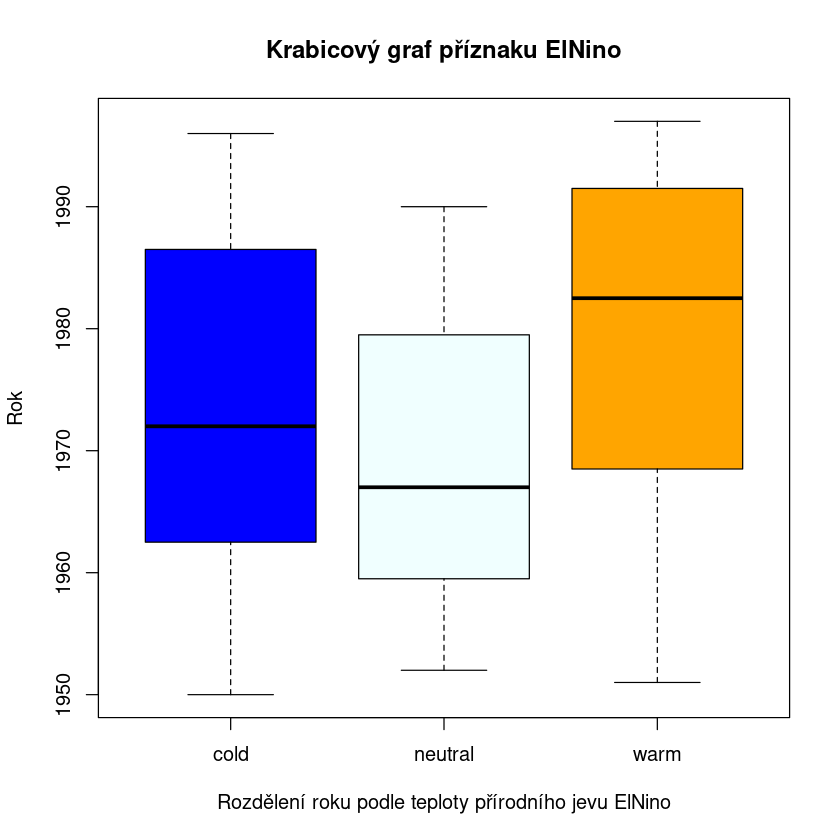

In [13]:
plot(df$ElNino, df$Year, main="Krabicový graf příznaku ElNino", xlab="Rozdělení roku podle teploty přírodního jevu ElNino", ylab="Rok", col=c("blue", "azure", "orange"))

Z následujícího grafu vyčteme, že trend počasí v Africe se během sledovaného půlstoletí změnil z vlhkého na suchý a to relativně razantně. Na konci tisíciletí se dokonce vlhý rok objevoval jen vzácně.

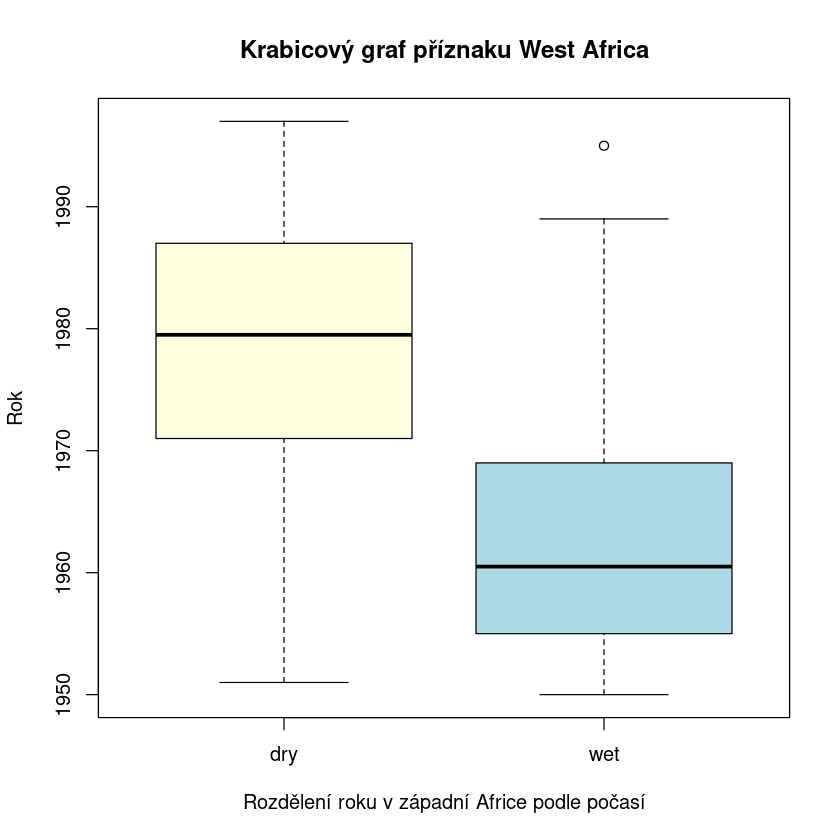

In [14]:
plot(df$WestAfrica, df$Year, main="Krabicový graf příznaku West Africa", xlab="Rozdělení roku v západní Africe podle počasí", ylab="Rok", col=c("lightyellow", "lightblue"))

Na následujících grafech je patrné, že počet bouřek v průběhu let nebyl stabilní a v letech 1969 a 1995 si můžeme všimnout extrémního nárůstu, kterým předcházely a následovaly po nich relativně drastické poklesy počtu bouřek.

Z histogramu vyčteme, že nejčastější počty bouřek jsou v rozmězí 5 až 15 bouřek za rok.

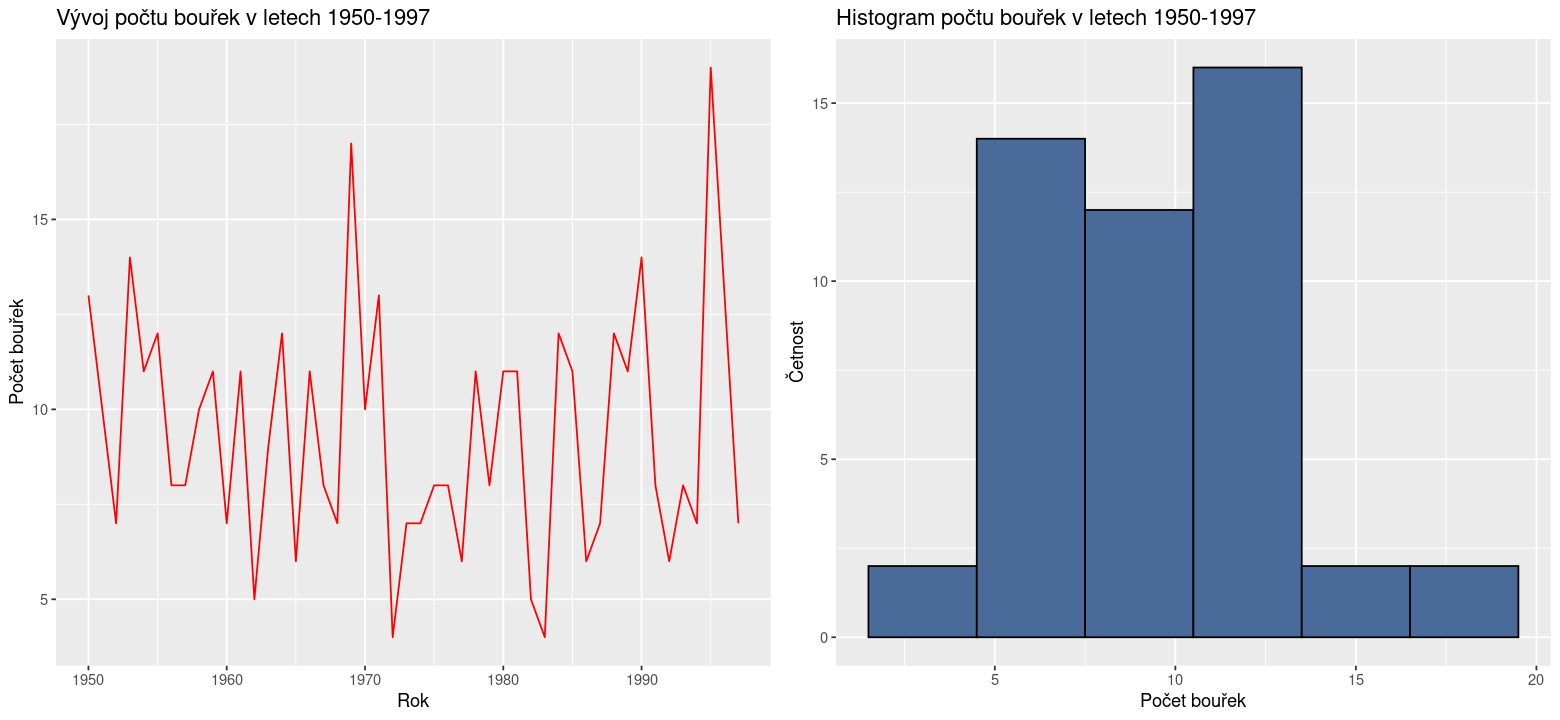

In [15]:
options(repr.plot.width=13, repr.plot.height=6, scipen=5)
p1 <- ggplot(df, aes(x=Year, y=Storms)) +
    geom_line(color="red") +
    labs(x="Rok", y="Počet bouřek", title="Vývoj počtu bouřek v letech 1950-1997")

p2 <- ggplot(df, aes(x=Storms)) +
    geom_histogram(binwidth=3, fill="#4a6b9a", color="black") +
    labs(x="Počet bouřek", y="Četnost", title="Histogram počtu bouřek v letech 1950-1997")

plot_grid(p1, p2)

Následující grafy naznačují podobné chování počtu hurikánů jako u počtu bouřek. Opět si můžeme všimnout relativní nestability a extrémních nárůstů v letech 1969 a 1995.

Z histogramu vyčteme, že nejčastější počet hurikánů je okolo 5 za rok a více jak 10 hurikánů za rok se objevuje zřídka kdy.

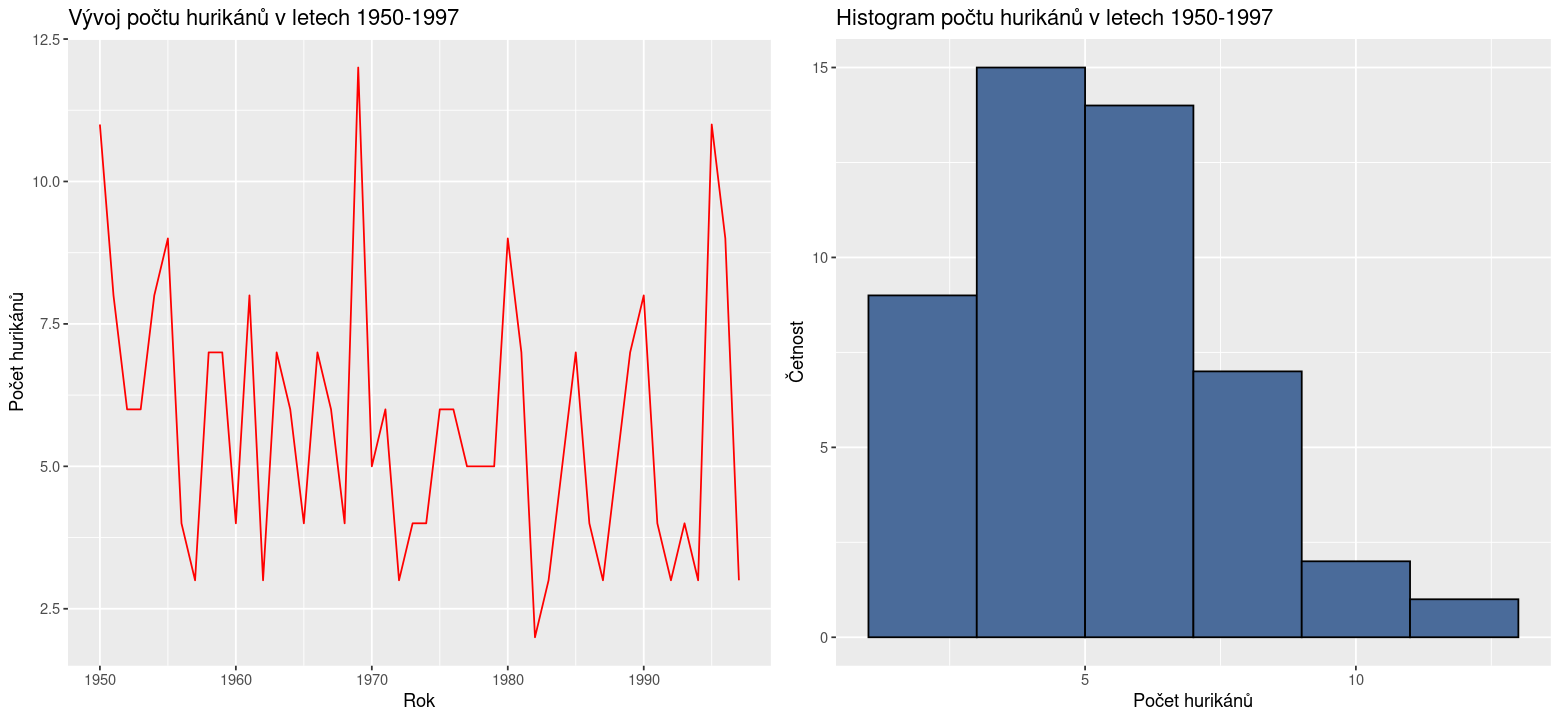

In [16]:
p1 <- ggplot(df, aes(x=Year, y=Hurricanes)) +
    geom_line(color="red") +
    labs(x="Rok", y="Počet hurikánů", title="Vývoj počtu hurikánů v letech 1950-1997")

p2 <- ggplot(df, aes(x=Hurricanes)) +
    geom_histogram(binwidth=2, fill="#4a6b9a", color="black") +
    labs(x="Počet hurikánů", y="Četnost", title="Histogram počtu hurikánů v letech 1950-1997")

plot_grid(p1, p2)

Vývoj bouřkového indexu je mírně odlišný od počtu bouřek a hurikánů, přestože na něm pozorujeme například nestabilitu a extrémní nárůst v roce 1995.

Z kraje sledovaného půlstoletí jsou vyšší hodnoty častější než v letech 1970 až 1990 a propad hodnot v tomto období je výrazný.

Z histogramu dále vyčteme, že nejčastější hodnota bouřkového indexu je 20 až 150 a hodnoty nad 150 se objevují vzácně.

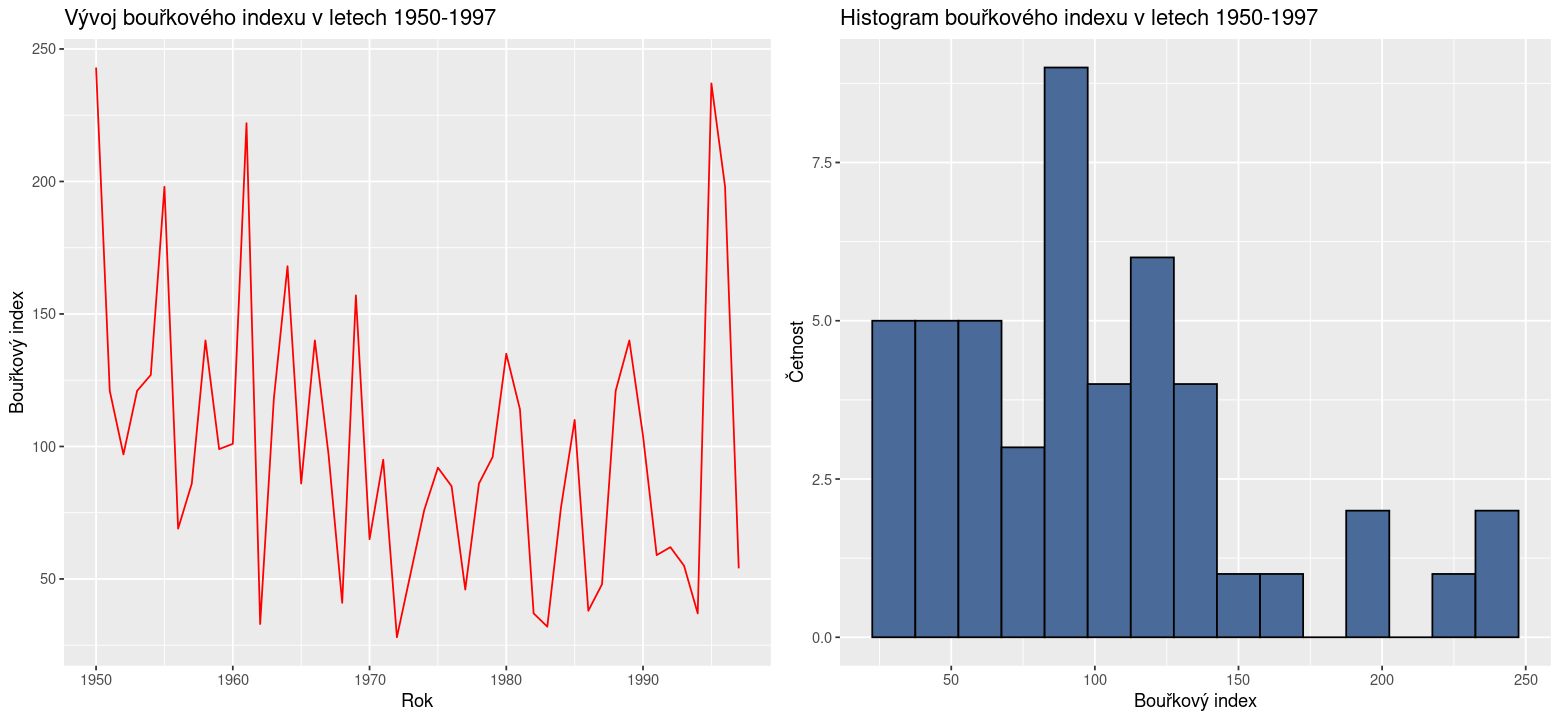

In [17]:
p1 <- ggplot(df, aes(x=Year, y=StormIndex)) +
    geom_line(color="red") +
    labs(x="Rok", y="Bouřkový index", title="Vývoj bouřkového indexu v letech 1950-1997")

p2 <- ggplot(df, aes(x=StormIndex)) +
    geom_histogram(binwidth=15, fill="#4a6b9a", color="black") +
    labs(x="Bouřkový index", y="Četnost", title="Histogram bouřkového indexu v letech 1950-1997")

plot_grid(p1, p2)

## Úloha 2

_Vybraný regresor:_ `Storms`

Níže natrénujeme regresní modely lineární a kvadratický.

In [18]:
fit_lin <- lm(StormIndex~Storms, data=df) # natrénování modelu
tmp <- predict(fit_lin, interval="prediction") # predikce na našich datech
df_lin <- cbind(df, tmp) # uložení predikce do datasetu

fit_quad <- lm(StormIndex~Storms+I(Storms^2), data=df)
tmp <- predict(fit_quad, interval="prediction")
df_quad <- cbind(df, tmp)

Warning message in predict.lm(fit_lin, interval = "prediction"):
“predictions on current data refer to _future_ responses
”
Warning message in predict.lm(fit_quad, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


*Lineární model*

Z níže vypsaných statistik vyčteme, že chyba regrese se pohybuje mezi -60 a 100. Medián této chyby je 0,1 a první s třetím kvartilem se relativně neliší.

Na základě testu o nulovosti koeficientů zamítáme nulovost koeficientu u příznaku Storms, což mluví ve prospěch volby příznaku Storms jakožto regresoru.

U interceptu s hodnotou -23 ale nulovost nezamítáme, takže pro naší predikci není statisticky významný.

Směrodatná odchylka koeficientů je 15 pro intercept a pouze 1 pro příznak Storms.

Odhad chyby regrese je 34, což je relativně vysoká hodnota a mluví v neprospěch modelu.

F-test s nulovou hypotézou, že vysvětlující proměnná Storms není statisticky významná zamítáme, což mluví ve prospěch modelu.

In [19]:
summary(fit_lin)


Call:
lm(formula = StormIndex ~ Storms, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.165 -21.777   0.111  15.353  99.994 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -22.749     15.456  -1.472    0.148    
Storms        13.159      1.558   8.447 6.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.39 on 46 degrees of freedom
Multiple R-squared:  0.608,	Adjusted R-squared:  0.5995 
F-statistic: 71.36 on 1 and 46 DF,  p-value: 6.534e-11


*Kvadratický model*

Z níže vypsaných statistik vyčteme, že se chyba regrese opět pohybuje mezi -60 a 100. Medián této chyby je 1 a první s třetím kvartilem se opět relativně neliší.

Na základě testu o nulovosti koeficientů opět zamítáme nulovost příznaku Storms, ale nulovost interceptu ani kvadrátu Storms nezamítáme, což indikuje, že tyto členy nejsou statisticky významné.

Směrodatná odchylka koeficientů je 37 pro intercept a pouze 7,5 pro příznak Storms, což je výrazně více než u lineárního modelu.

Odhad chyby regrese je opět 34, což je relativně vysoká hodnota a mluví v neprospěch modelu.

T-test závislosti regresandu na regresoru Storms vychází významně, ale pro regresor Storms^2 nevyýznamě, což naznačuje, že by nemusel být takový regresor vhodný.

F-test s nulovou hypotézou, že vysvětlující proměnné nejsou statisticky významné zamítáme, což mluví ve prospěch modelu.

In [20]:
summary(fit_quad)


Call:
lm(formula = StormIndex ~ Storms + I(Storms^2), data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-60.59 -22.18   1.47  14.96  96.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -49.9247    37.3669  -1.336   0.1882  
Storms       18.9767     7.4425   2.550   0.0143 *
I(Storms^2)  -0.2792     0.3492  -0.799   0.4282  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.53 on 45 degrees of freedom
Multiple R-squared:  0.6135,	Adjusted R-squared:  0.5964 
F-statistic: 35.72 on 2 and 45 DF,  p-value: 5.131e-10


Na následujících grafech si můžeme prohlédnout predikce lineární a kvadratické regrese na našich datech. Na první pohled se zdá lineární regrese mírně kvalitnějším odhadem. 

Většina datových bodů se u obou modelů nachází uvnitř pásů spolehlivosti.

Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_smooth()`).”
Warning message:
“Removed 25 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


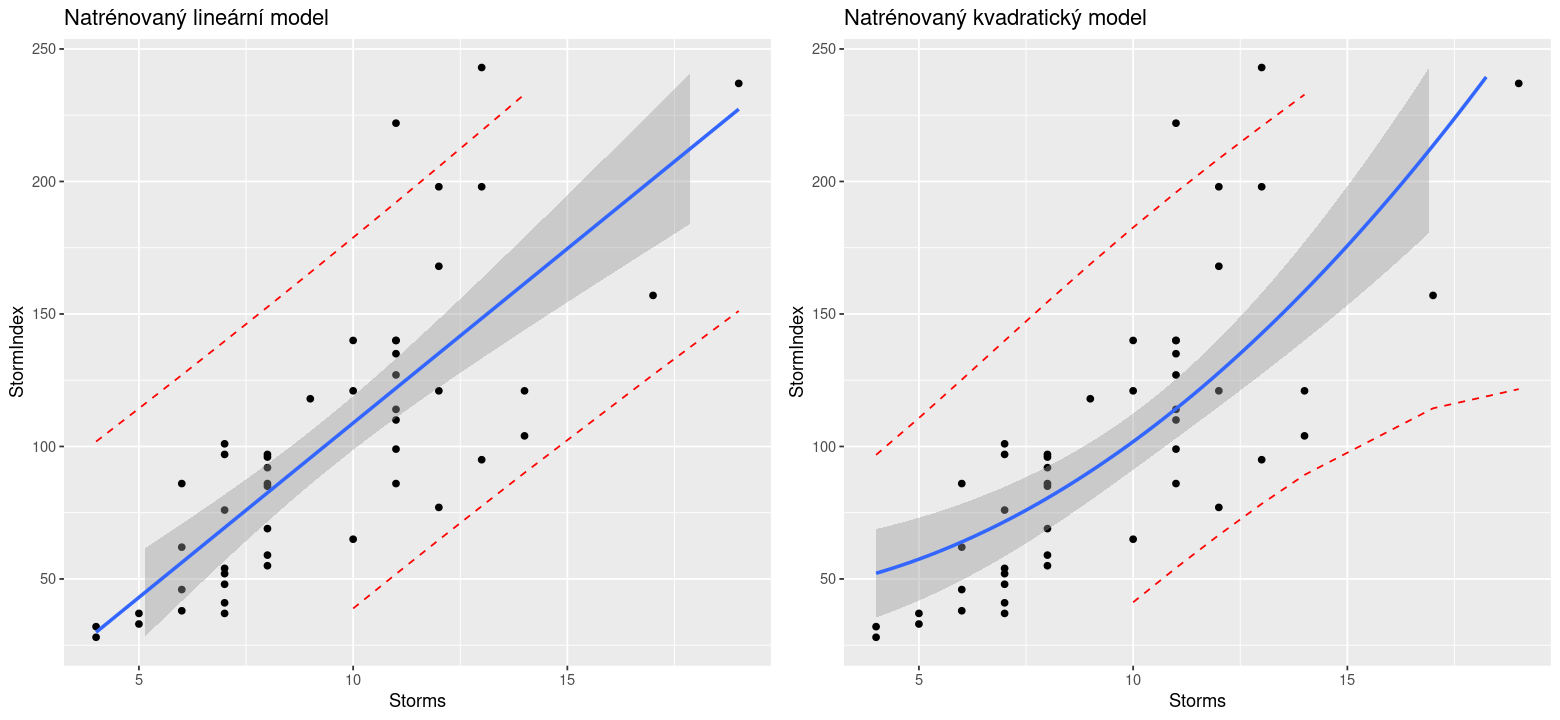

In [21]:
p1 <- ggplot(df_lin, aes(x=Storms, y=StormIndex)) +
        geom_point() +
        stat_smooth(method="lm", formula=y~x) +
        geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
        geom_line(aes(y=upr), color = "red", linetype = "dashed") +
        ylim(min(df$StormIndex), max(df$StormIndex)) +
        labs(title="Natrénovaný lineární model")

p2 <- ggplot(df_quad, aes(x=Storms, y=StormIndex)) +
        geom_point() +
        stat_smooth(method="lm", formula=y~I(x^2)) +
        geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
        geom_line(aes(y=upr), color = "red", linetype = "dashed") +
        ylim(min(df$StormIndex), max(df$StormIndex)) +
        labs(title="Natrénovaný kvadratický model")

plot_grid(p1, p2, ncol=2)

Na grafu reziduí obou odhadů můžeme pozorovat horší predikce pro hodnoty bouřkového indexu vyššího než 100.

Můžeme se domnívat, že je to z nedostatku datových bodů s takto vysokým bouřkovým indexem.

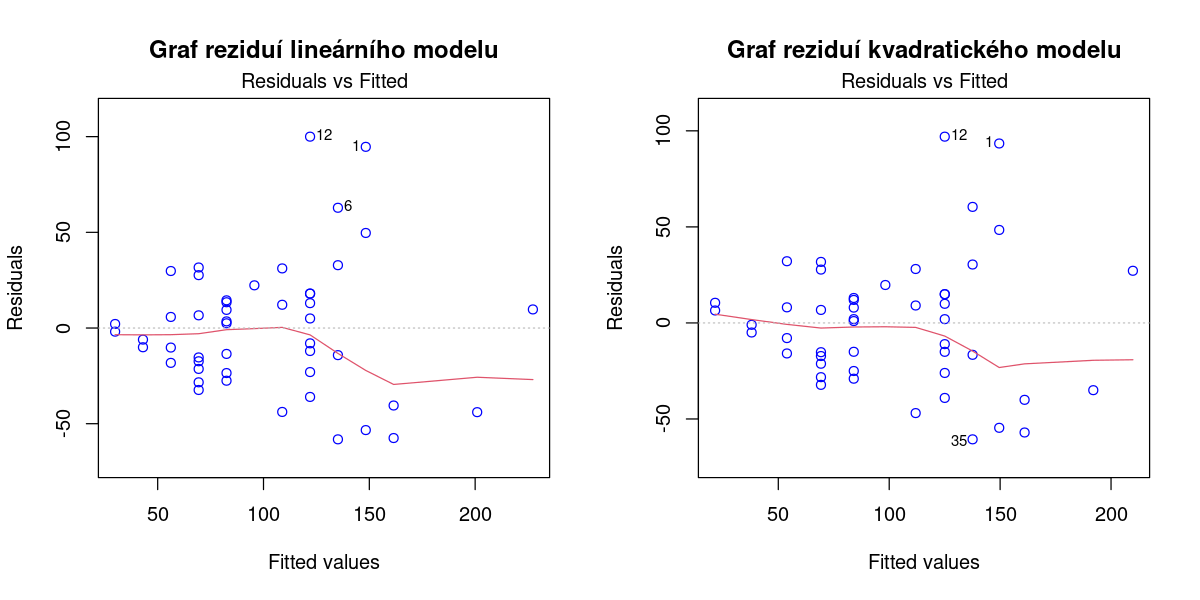

In [22]:
options(repr.plot.width=10, repr.plot.height=5, scipen=5)

par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=1, col=c("blue"), main="Graf reziduí lineárního modelu")
p2 <- plot(fit_quad, which=1, col=c("blue"), main="Graf reziduí kvadratického modelu")

Koeficient korelace mezi predikcemi a reálnými hodnotami vysvětlované proměnné pro oba modely vyšel stejný a výsledek indikuje jejich silnou lineární závislost.

In [23]:
ols_test_correlation(fit_lin)
ols_test_correlation(fit_quad)

[1] 0.9745886

[1] 0.9770346

Na následujím Q-Q grafu pozorujeme normalitu reziduí. Tuto domněnku otestujeme testem normality.

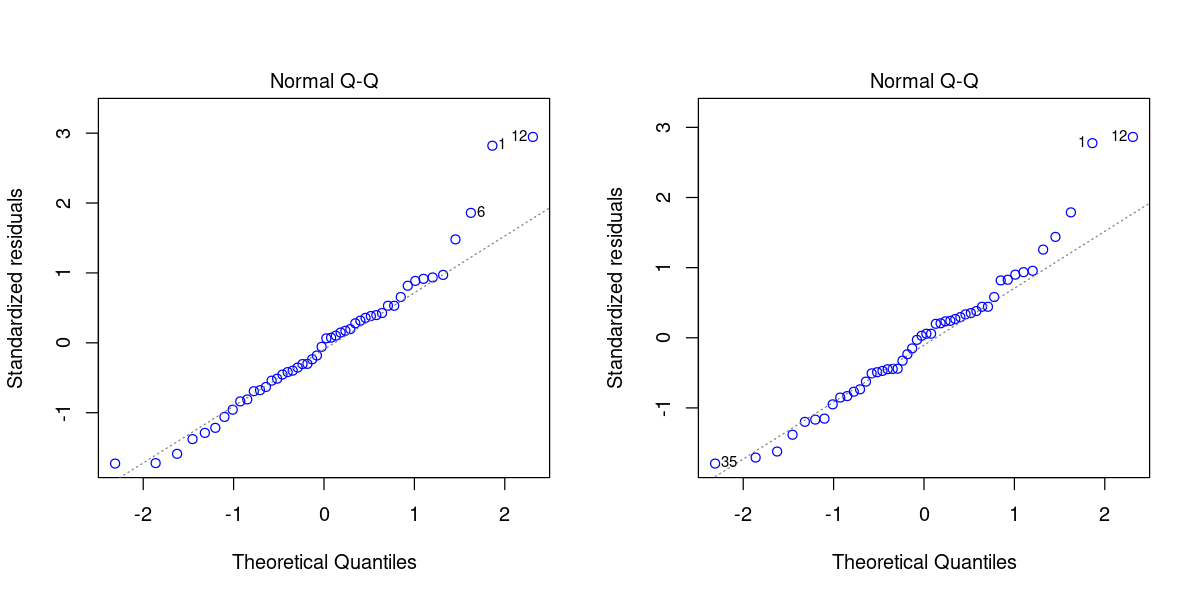

In [24]:
options(repr.plot.width=10, repr.plot.height=5, scipen=5)

par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=2, col=c("blue"))
p2 <- plot(fit_quad, which=2, col=c("blue"))

Na základě Shapiro-Wilkova testu normalitu reziduí, tedy nulovou hypotézu, zamítáme u lineárního modelu a u kvadratického jí nezamítáme, což mluví ve prospěch kvadratického odhadu.

In [25]:
ols_test_normality(fit_lin)
ols_test_normality(fit_quad)

Warning message in ks.test(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9512         0.0448 
Kolmogorov-Smirnov        0.0901         0.8303 
Cramer-von Mises            4            0.0000 
Anderson-Darling          0.4976         0.2018 
-----------------------------------------------

Warning message in ks.test(y, "pnorm", mean(y), sd(y)):
“ties should not be present for the Kolmogorov-Smirnov test”


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.956          0.0697 
Kolmogorov-Smirnov        0.0998         0.7256 
Cramer-von Mises          3.9993         0.0000 
Anderson-Darling          0.4788         0.2249 
-----------------------------------------------

Na následujícím grafu si všímáme heteroskedasticity a naší domněnku otestujeme Breusch-Paganovým testem, který jako nulovou hypotézu používá homoskedasticitu.

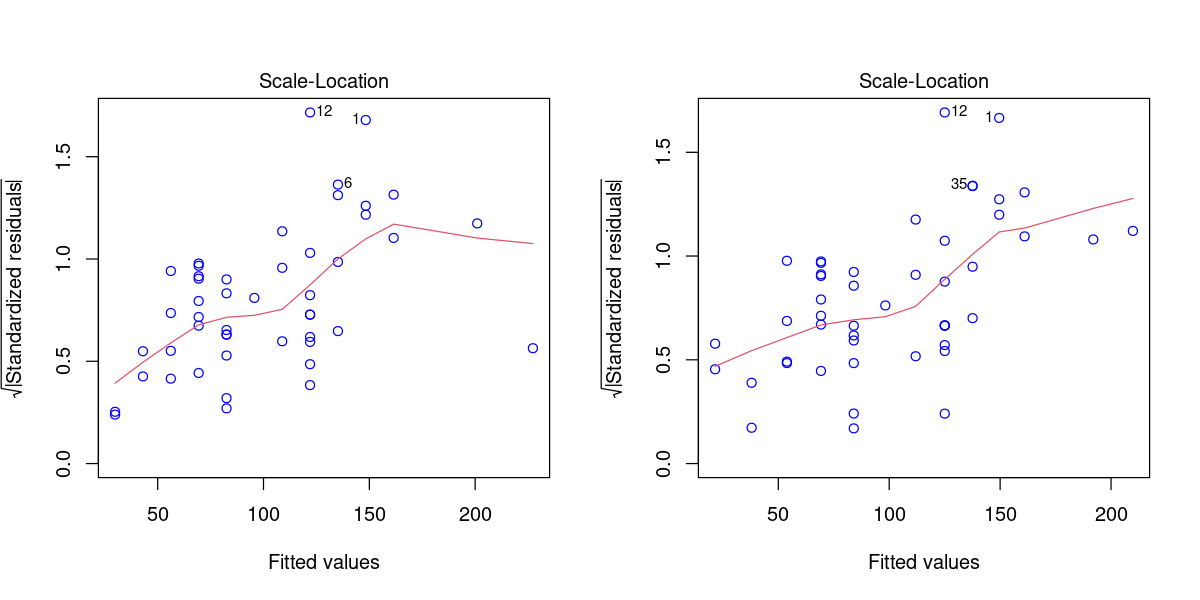

In [26]:
options(repr.plot.width=10, repr.plot.height=5, scipen=5)

par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=3, col=c("blue"))
p2 <- plot(fit_quad, which=3, col=c("blue"))

Na základě výsledku testu zamítáme homoskedasticitu, což podporuje naší domněnku, že rezidua v obou modelech nemají konstantní průběh.

In [27]:
ols_test_breusch_pagan(fit_lin)
cat('=======================================')
ols_test_breusch_pagan(fit_quad)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                 Data                  
 --------------------------------------
 Response : StormIndex 
 Variables: fitted values of StormIndex 

         Test Summary          
 ------------------------------
 DF            =    1 
 Chi2          =    10.61537 
 Prob > Chi2   =    0.001121513 


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                 Data                  
 --------------------------------------
 Response : StormIndex 
 Variables: fitted values of StormIndex 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    11.33417 
 Prob > Chi2   =    0.0007609399 

Na následujícím grafu pozorujeme, které datové body nejvíce ovlivňují odhad. Můžeme si všimnout, že v lineárním modelu je takových bodů mnohem více, než v tom kvadratickém, kde je pouze jeden významný outlier. Tento fakt mluví ve prospěch kvadratického modelu.

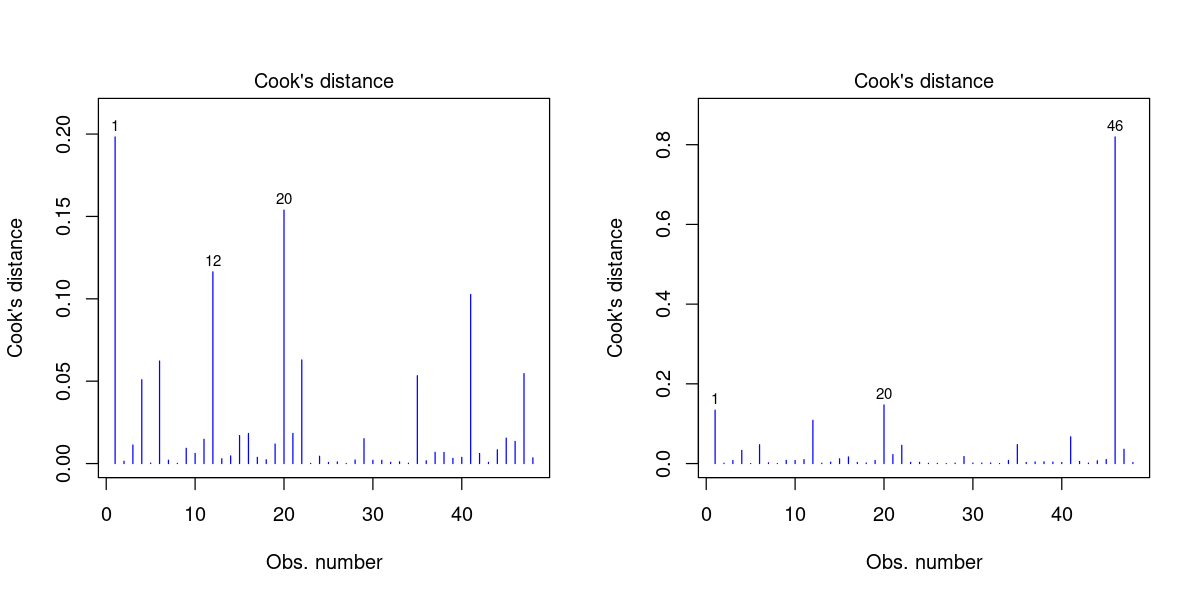

In [28]:
par(mfrow=c(1,2))
p1 <- plot(fit_lin, which=4, col=c("blue"))
p2 <- plot(fit_quad, which=4, col=c("blue"))

## Úloha 3

Jako regresor vybereme kategoriální proměnnou `WestAfrica`.

Připomeňme, že tato proměnná nabývá dvou hodnot: `wet` a `dry`. Tedy označuje, zda byl v západní Africe rok suchý, nebo vlhký.

Podíváme se, jak se mění histogram a boxplot vysvětlované proměnné v závislosti na těchto kategoriích.

In [29]:
df_africa_wet <- df[df$WestAfrica == "wet",]
df_africa_dry <- df[df$WestAfrica == "dry",]

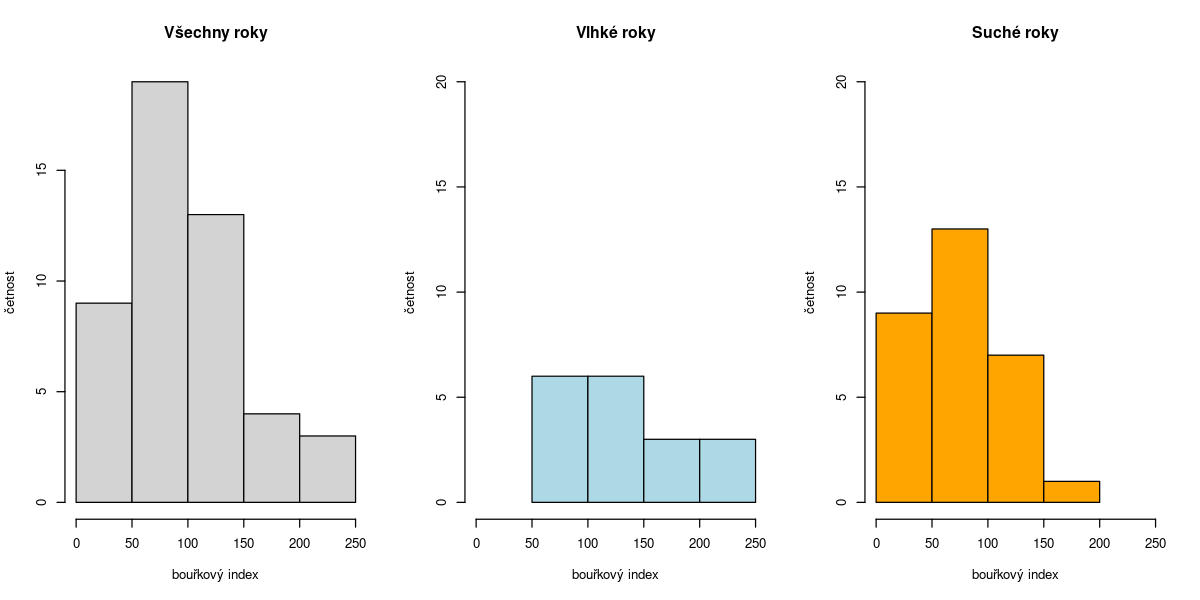

In [30]:
par(mfrow=c(1,3))
hist(df$StormIndex, breaks=5, main="Všechny roky", xlab="bouřkový index", ylab="četnost")
hist(df_africa_wet$StormIndex, col='lightblue', xlim=c(0,250), ylim=c(0,20), breaks=5, main="Vlhké roky", xlab="bouřkový index", ylab="četnost")
hist(df_africa_dry$StormIndex, col='orange', xlim=c(0,250), ylim=c(0,20), breaks=5, main="Suché roky", xlab="bouřkový index", ylab="četnost")

Z histogramů je patrné, že bouřkový index na klimatu v západní Africe závisí. Pro suché roky má bouřkový index tendenci být spíše nižší.

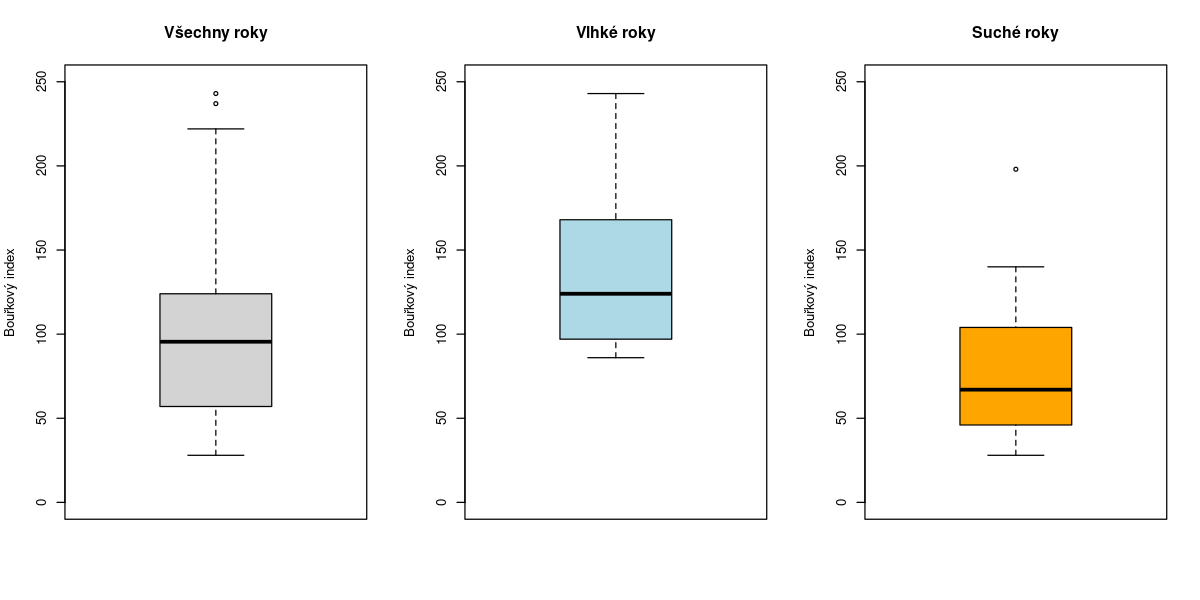

In [31]:
par(mfrow=c(1,3))
boxplot(df$StormIndex, ylim=c(0,250), ylab="Bouřkový index", main="Všechny roky")
boxplot(df_africa_wet$StormIndex, col='lightblue', ylim=c(0,250), main="Vlhké roky", ylab="Bouřkový index")
boxplot(df_africa_dry$StormIndex, col='orange', ylim=c(0,250), main="Suché roky", ylab="Bouřkový index")

Opět pozorujeme jev, že při vlhkých letech byl bouřkový index povětšinou vyšší. Vidíme také odlehlou hodnotu - jednou byl bouřkový index velmi vysoký i v suchém roce.

**Analýza rozptylu**

Zajímá nás, jestli je bouřkový index stejný pro obě kategorie proměnné `WestAfrica`, nebo jestli je významně různý. Proto provedeme analýzu rozptylu.

Pro metody analýzy rozptylu se předpokládá normalita odchylek a shoda rozptylů odchylek napříč kategoriemi. Tyto předpoklady zatím ověřovat nebudeme. Ověříme je až u finálního modelu pomocí vhodných testů.

Provedeme nyní test hypotézy středních hodnot pomocí F-testu analýzy rozptylu.

Porovnáváme reziduální součet čtverců $S_e$, neboli variabilitu uvnitř výběru, s celkovým součtem čtverců $S_T$, tedy s celkovou variabilitou.

Pro celkovou variabilitu platí, že $S_T = S_e + S_A$, kde $S_A$ označuje variabilitu mezi výběry, která je vysvětlena modelem. Snažíme se zjistit, jestli je rozdíl mezi středními hodnotami v jednotlivých kategoriích významně velký. Různost těchto středních hodnot je reprezentována právě variabilitou mezi výběry.

Nejprve vypíšeme tabulku velikosti součtu čtverců.

In [32]:
aov(StormIndex ~ WestAfrica, data = df)

Call:
   aov(formula = StormIndex ~ WestAfrica, data = df)

Terms:
                WestAfrica Residuals
Sum of Squares    45553.51  93282.97
Deg. of Freedom          1        46

Residual standard error: 45.03211
Estimated effects may be unbalanced

Pro náš model dostáváme, že
$S_e = 93282.97$
a
$S_A = 45553.51$
.

Součet  čtverců vysvětlený různými průměry ve skupinách vyšel poměrně vysoký. To již může nabádat k tomu, že se střední hodnoty jednotlivých kategorií významně liší. Ještě je však třeba provést zmiňovaný F-test.

Testujeme hypotézu $H_0$, za jejíž platnosti má $F=\frac{S_A/(I-1)}{S_e/(n-I)}$ Fisherovo F-rozdělení $F_{I-1,n-I}$.

Tedy když bude p-hodnota, která předastavuje pravděpodobnost, že F-rozdělení bude vyšší než spočítaná F-statistika, vyšší než standardní kritická hodnota, hypotézu o shodě středních hodnot nezamítneme.

In [33]:
anova(aov(StormIndex ~ WestAfrica, data = df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WestAfrica,1,45553.51,45553.512,22.4635,0.00002094731
Residuals,46,93282.97,2027.891,NA,NA


Vyšla p-hodnota nižší než $0.05$, proto na hladině významnosti $\alpha = 5 \%$ *zamítáme* nulovou hypotézu ve prospěch alternativy, že střední hodnoty bouřkového indexu jednotlivých kategorií proměnné `WestAfrica` jsou různé.

Proto se můžeme domnívat, že proměnná `WestAfrica` bude mít příznivý vliv na kvalitu modelu.

**Model**

Natrénujeme nyní model závisející pouze na tomto kategorickém regresoru. V tomto případě bude model pouze konstantní s posunem závisejícím na příslušné kategorii.

In [34]:
fit_africa <- lm(StormIndex~WestAfrica, data=df)
fit_africa


Call:
lm(formula = StormIndex ~ WestAfrica, data = df)

Coefficients:
  (Intercept)  WestAfricawet  
        77.03          63.63  


Regresní koeficient u `(intercept)` představuje konstantu popisující případ suchého roku v západní Africe.

Koeficient u `WestAfricawet` představuje rozdíl mezi konstantami popisujícími vlhký a suchý rok.

Tedy pro suchý rok vždy predikujeme hodotu $77.03$ a pro vlhký rok vždy predikujeme $77.03 + 63.63 = 140.66$.

Jak můžeme vidět, jedná se o průměry.

In [35]:
cat("Průměr bouřkového indexu pro suché roky:", mean(df_africa_dry$StormIndex), "\n")
cat("Průměr bouřkového indexu pro vlhké roky:", mean(df_africa_wet$StormIndex), "\n")

Průměr bouřkového indexu pro suché roky: 77.03333 
Průměr bouřkového indexu pro vlhké roky: 140.6667 


**Zhodnocení kvality modelu**

Vypíšeme si informace o modelu.

In [36]:
summary(fit_africa)


Call:
lm(formula = StormIndex ~ WestAfrica, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-54.67 -39.19 -12.85  27.06 120.97 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     77.033      8.222    9.37 3.10e-12 ***
WestAfricawet   63.633     13.426    4.74 2.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.03 on 46 degrees of freedom
Multiple R-squared:  0.3281,	Adjusted R-squared:  0.3135 
F-statistic: 22.46 on 1 and 46 DF,  p-value: 0.00002095


Testy nulovosti regresních koeficientů vyšly významně, což značí, že intercept i `WestAfrica` se kladně podílí na výkonnosti modelu.

Koeficient determinace vyšel přibližně 0.32, což je nižší hodnota než u předchozích modelů pracujících s numerickou proměnnou. Hodnota vcelku vyšší než 0 ale značí, že predikce pomocí průměru kategorie je dost přesnější, než kdybychom predikovali průměr společný.

Model vizualizujeme s ohledem na předchozí numerickou proměnnou.

Warning message in predict.lm(fit_africa, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


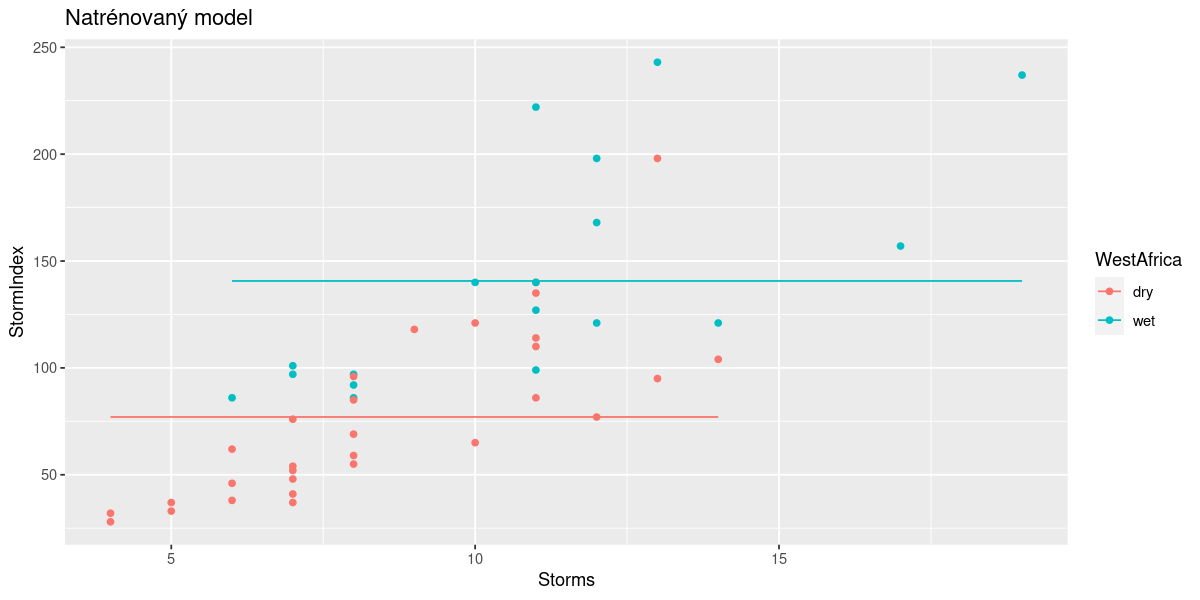

In [37]:
tmp <- predict(fit_africa, interval="prediction")
df_africa_predicted <- cbind(df, tmp)

ggplot(df_africa_predicted, aes(x=Storms, y=StormIndex, color=WestAfrica)) +
    geom_point() +
    geom_line(aes(y=fit)) +
    labs(title="Natrénovaný model")

Je patrné, že data by v rámci kategorií mohla být popsána lépe než konstantní funkcí. Proto do modelu zapojíme i předchozí spojitou proměnnou `Storms`.

## Úloha 4

Nyní budeme uvažovat model s oběma regresory z předchozích bodů, tedy numerickým regresorem `Storms` a kategroickým regresorem `WestAfrica`.

In [38]:
fit_storms_africa <- lm(StormIndex ~ WestAfrica * Storms, data=df)
summary(fit_storms_africa)


Call:
lm(formula = StormIndex ~ WestAfrica * Storms, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.020 -17.888  -2.418  13.390  80.745 

Coefficients:
                     Estimate Std. Error t value   Pr(>|t|)    
(Intercept)          -20.8265    18.5476  -1.123      0.268    
WestAfricawet         45.6097    31.0102   1.471      0.148    
Storms                11.5582     2.0877   5.536 0.00000161 ***
WestAfricawet:Storms  -0.9699     3.0125  -0.322      0.749    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.79 on 44 degrees of freedom
Multiple R-squared:  0.6996,	Adjusted R-squared:  0.6791 
F-statistic: 34.16 on 3 and 44 DF,  p-value: 1.465e-11


Koeficienty:
* `(Intercept)`: značí vertikální posun regresní přímky v případě suchého roku v Africe
* `WestAfricawet`: o hodnotu tohoto koeficientu je vertikální posun regresní přímky vyšší v případě vlhkého roku v Africa
* `Storms`: udává směrnici regresní přímky pro suché roky
* `WestAfricawet:Storms`: o tuto hodnotu je směrnice regresní přímky vyšší ve vlhkém roce

Zamítáme nulovost koeficientu numerického regresoru `Storms`, tato komponenta je tedy významná. Naopak nezamítáme nulovost všech ostatních regresorů.

Koeficient determinace je zatím nejvyšší, na jaký jsme narazili.

Zobrazíme regresní závislost graficky.

Warning message in predict.lm(fit_storms_africa, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


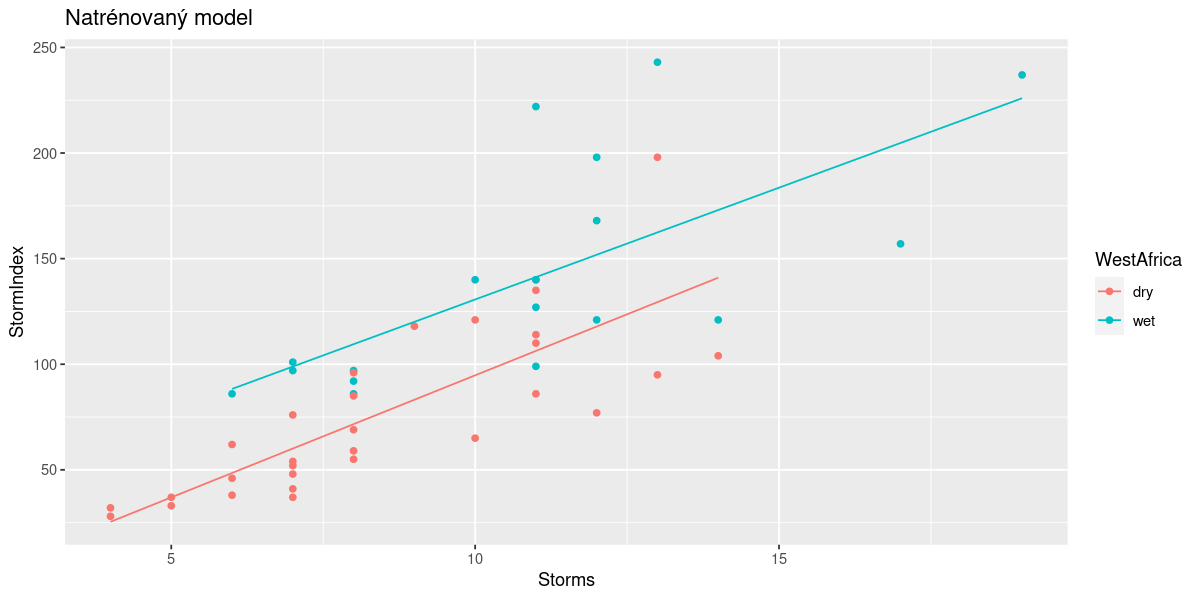

In [39]:
tmp <- predict(fit_storms_africa, interval="prediction")
df_storms_africa_predicted <- cbind(df, tmp)

ggplot(df_storms_africa_predicted, aes(x=Storms, y=StormIndex, color=WestAfrica)) +
    geom_point() +
    geom_line(aes(y=fit)) +
    labs(title="Natrénovaný model")

Je zjevný rozdíl predikce pro suché a vlhké roky. Proto je zajímavé, že koeficienty ovlivňující tento rozdíl vyšly nevýznamné.

## Úloha 5

V této úloze rozšíříme model o oba zbývající regresory - kategorický `ElNino` a numerický `Hurricanes`.

In [40]:
fit_all <- lm(StormIndex ~ Storms + Hurricanes + WestAfrica + ElNino, data=df)
summary(fit_all)


Call:
lm(formula = StormIndex ~ Storms + Hurricanes + WestAfrica + 
    ElNino, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-57.16 -13.83  -1.53  12.71  59.37 

Coefficients:
              Estimate Std. Error t value   Pr(>|t|)    
(Intercept)     0.5279    15.3712   0.034    0.97277    
Storms          2.4275     1.9519   1.244    0.22051    
Hurricanes     13.9502     2.7348   5.101 0.00000767 ***
WestAfricawet  23.8032     7.9849   2.981    0.00476 ** 
ElNinoneutral -18.8412     8.7259  -2.159    0.03659 *  
ElNinowarm    -15.9004    10.1271  -1.570    0.12390    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.6 on 42 degrees of freedom
Multiple R-squared:  0.8315,	Adjusted R-squared:  0.8114 
F-statistic: 41.45 on 5 and 42 DF,  p-value: 3.48e-15


Zamítáme nulovost koeficientu u proměnných `Hurricanes`, `WestAfricawet` a `ElNinoneutral` - tyto proměnné jsou tedy významné. Kupodivu narozdíl od předešlých modelů nezamítáme nulovost koeficientu pro proměnnou `Storms`.

Nyní se vrhněme na výběr vhodného modelu. Nejprve vyberme dosud nejlepší model, následně se z něj pokusíme odstranit nevýznamné komponenty. Kvalitu dosavadních modelů porovnáme pomocí Akaikeho a Bayesovského kritéria.

In [41]:
AIC(fit_lin, fit_quad, fit_africa, fit_storms_africa, fit_all)

,df,AIC
,<dbl>,<dbl>
fit_lin,3,479.8146
fit_quad,4,481.1376
fit_africa,3,505.6833
fit_storms_africa,5,471.0396
fit_all,7,447.2909


In [42]:
BIC(fit_lin, fit_quad, fit_africa, fit_storms_africa, fit_all)

,df,BIC
,<dbl>,<dbl>
fit_lin,3,485.4282
fit_quad,4,488.6224
fit_africa,3,511.2969
fit_storms_africa,5,480.3956
fit_all,7,460.3893


V obou případech vítězí model, který obsahuje všechny regresory. Nyní z modelu vyjmeme nejméně signifikantní regresor - `Storms`.

In [43]:
fit_all_except_storms <- lm(StormIndex ~ Hurricanes + WestAfrica + ElNino, data=df)
summary(fit_all_except_storms)


Call:
lm(formula = StormIndex ~ Hurricanes + WestAfrica + ElNino, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.847 -14.838   0.917  13.335  56.395 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.551     13.637   0.700   0.4875    
Hurricanes      16.489      1.832   9.002  1.9e-11 ***
WestAfricawet   24.145      8.031   3.007   0.0044 ** 
ElNinoneutral  -19.713      8.753  -2.252   0.0295 *  
ElNinowarm     -17.846     10.069  -1.772   0.0834 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.75 on 43 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.809 
F-statistic: 50.78 on 4 and 43 DF,  p-value: 9.601e-16


Nový model obsahuje jednu statisticky nevýznamnou komponentu - `ElNinowarm`.

Nyní pomocí F-testu porovnejme, zda je mezi modely statisticky významný rozdíl

In [44]:
anova(fit_all, fit_all_except_storms)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,23393.60,NA,NA,NA,NA
2,43,24255.13,-1,-861.5305,1.54676,0.2205115


Mezi modely není statisticky významný rozdíl. Abychom se zbavili poslední nevýznamné komponenty, vybereme z `ElNino` pouze informaci o "chladnosti", jelikož v předchozím modelu se příliš neliší koeficient `warm` a `cold` (vycházíme z toho, že `ElNino` může nabývat pouze jedné z těchto tří hodnot).

In [45]:
is_cold <- df$ElNino == "cold"
fit_africa_hurricanes_cold <- lm(StormIndex ~ WestAfrica + Hurricanes + is_cold, data=df)
summary(fit_africa_hurricanes_cold)


Call:
lm(formula = StormIndex ~ WestAfrica + Hurricanes + is_cold, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.768 -15.181   1.089  12.953  56.531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -8.460      9.057  -0.934  0.35535    
WestAfricawet   24.187      7.940   3.046  0.00391 ** 
Hurricanes      16.337      1.651   9.895 9.24e-13 ***
is_coldTRUE     19.048      8.017   2.376  0.02193 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.49 on 44 degrees of freedom
Multiple R-squared:  0.8251,	Adjusted R-squared:  0.8132 
F-statistic: 69.21 on 3 and 44 DF,  p-value: < 2.2e-16


Tento model již nemá nevýznamné komponenty, pro jistotu ještě otestujme, zda je statisticky významný rozdíl mezi tímto podmodelem a původním modelem.

In [46]:
anova(fit_all, fit_africa_hurricanes_cold)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,23393.60,NA,NA,NA,NA
2,44,24278.01,-2,-884.407,0.7939158,0.4587378


Mezi modely není statisticky významný rozdíl, tedy tento podmodel můžeme zvolit za finální. Pro zajímavost se podívejme, jak se po každé úpravě změnilo Akaikeho a Bayesovské kritérium.

In [47]:
AIC(fit_all, fit_all_except_storms, fit_africa_hurricanes_cold)

,df,AIC
,<dbl>,<dbl>
fit_all,7,447.2909
fit_all_except_storms,6,447.0269
fit_africa_hurricanes_cold,5,445.0721


In [48]:
BIC(fit_all, fit_all_except_storms, fit_africa_hurricanes_cold)

,df,BIC
,<dbl>,<dbl>
fit_all,7,460.3893
fit_all_except_storms,6,458.2541
fit_africa_hurricanes_cold,5,454.4281


Pozorujeme mírné zlepšení u obou kritérií. Nyní interpretujeme finální model.

In [49]:
fit_final <- fit_africa_hurricanes_cold
summary(fit_final)


Call:
lm(formula = StormIndex ~ WestAfrica + Hurricanes + is_cold, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.768 -15.181   1.089  12.953  56.531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -8.460      9.057  -0.934  0.35535    
WestAfricawet   24.187      7.940   3.046  0.00391 ** 
Hurricanes      16.337      1.651   9.895 9.24e-13 ***
is_coldTRUE     19.048      8.017   2.376  0.02193 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.49 on 44 degrees of freedom
Multiple R-squared:  0.8251,	Adjusted R-squared:  0.8132 
F-statistic: 69.21 on 3 and 44 DF,  p-value: < 2.2e-16


Koeficienty:
- `(Intercept)`: značí vertikální posun regresní přímky v případě suchého roku v Africe a "nechladné" fáze El Nina.
- `WestAfricawet`: pro vlhké roky predikujeme o ~16-32 větší `StormIndex`, než pro roky studené
- `Hurricanes`: statisticky nejvýznamnější regresor. Za každý hurikán, který se v daném roce objevil, roste hodnota `StormIndex` o ~15-17.
- `is_coldTRUE`: pro roky, kdy byla chladná fáze El Nina predikujeme o ~11-27 větší `StormIndex`.

Jednotlivé vztahý demonstrujeme na grafu

Warning message in predict.lm(fit_final, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


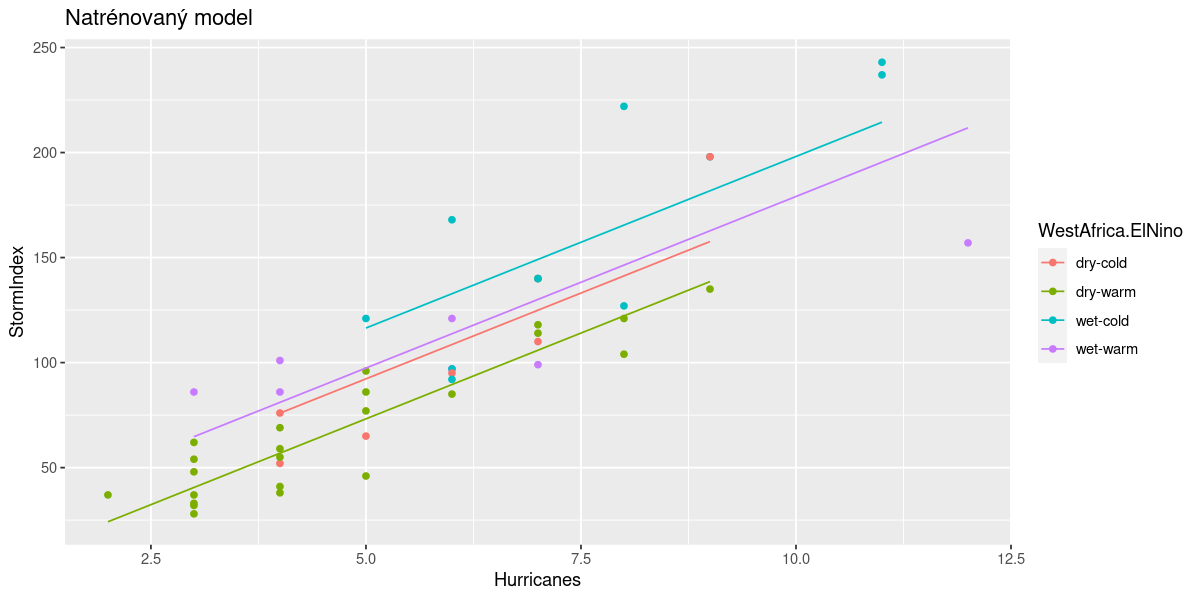

In [50]:
tmp <- predict(fit_final, interval="prediction")
df_final_predicted <- cbind(df, tmp)

ElNino <- factor(is_cold, labels = c("warm", "cold"))
df_final_predicted$WestAfrica.ElNino <- paste0(df_final_predicted$WestAfrica, "-", ElNino)

ggplot(df_final_predicted, aes(x=Hurricanes, y=StormIndex, color=WestAfrica.ElNino)) +
    geom_point() +
    geom_line(aes(y=fit)) +
    labs(title="Natrénovaný model")


## Úloha 6

V tomto úkolu ověříme předpoklady použitých metod pro finální model. Konkrétně musí platit předpoklady lineární regrese:

1. matici $\mathbf{X}^T\mathbf{X}$ lze dobře invertovat.
2. odchylky jsou nezávislé a stejně rozdělené (i.i.d.).
3. odchylky jsou gaussovské.

### Je matice $\mathbf{X}^T\mathbf{X}$ invertibilní?

Prvně se zaměřme na kolinearitu.

Rozptyl odhadů regresních koeficientů lze vyjádřit jako $$\operatorname{var}\hat\beta=\sigma^2(\mathbf X^T\mathbf X)^{-1}.$$

Tedy, pokud by regresory byly kolineární, pak by matice $\mathbf X^T\mathbf X$ byla špatně podmíněná a odhady regreních koeficientů by měly vysoký rozptyl.

Prvně se podívejme na korelační matici:

In [51]:
cor(model.matrix(fit_final)[,-1])

,WestAfricawet,Hurricanes,is_coldTRUE
WestAfricawet,1.0000000,0.4136456,0.3651484
Hurricanes,0.4136456,1.0000000,0.3776050
is_coldTRUE,0.3651484,0.3776050,1.0000000


Nepozorujeme významnou korelaci mezi jednotlivými regresory. Pro hlubší analýzu multikolinearity použijme faktor zvětšení rozptylu (VIF).

VIF se počítá tak, že nejprve vynecháme z původního modelu jeden regresor a nastavíme jej jako regresand nového lineárního modelu, ve kterém ponecháme zbylé regresory. Pro tento model napočteme koeficient determinace a spočteme VIF: $$\operatorname{VIF}_j=\frac{1}{1-R_j}.$$


In [52]:
ols_vif_tol(fit_final)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
WestAfricawet,0.7779749,1.285389
Hurricanes,0.7696695,1.299259
is_coldTRUE,0.8047401,1.242637


VIF se pro všechny regresory pohybuje kolem hodnoty `1.3`. Podle pravidla ze cvičení ("*V literatuře se udává, že regresory s $\operatorname{VIF}_j$ vyšším než 5 je dobré z modelu odstranit.*") tedy můžeme říct, že žádný regresor není dobré odstranit.

### Jsou rezidua nekorelovaná?

Korelace mezi rezidui by mohla indikovat závislost mezi nimi, což je pro regresy nežádoucí. Podívejme se na závislost mezi rezidui a nafitovaými hodnotami.

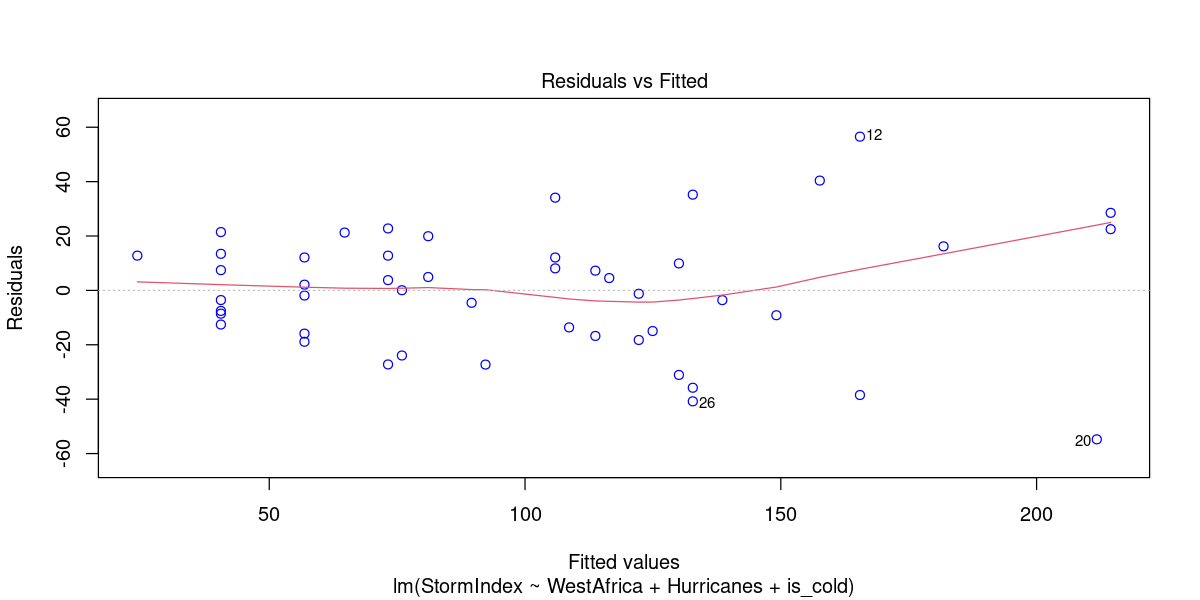

In [53]:
plot(fit_final, which=1, col=c("blue"))

Nekorelovanost rezudií otestujeme pomocí Durbin-Watsonova testu:
- označme autokorelaci reziduí jako $\alpha$
- $H_0: \alpha = 0$
- $H_A: \alpha \ne 0$

In [54]:
dwtest(fit_final, alternative="two.sided")


	Durbin-Watson test

data:  fit_final
DW = 1.6032, p-value = 0.14
alternative hypothesis: true autocorrelation is not 0


P-hodnota je vyšší, než 0.05, na standardní hladině spolehlivosti tedy nezamítáme nulovou hypotézu, že autokorelace je nulová.

### Jsou odchylky Gaussovské?

Dalším předpokladem lineární regrese je, že rezidua pochází z normálního rozdělení. Vizuálně můžeme tuto vlastnost pozorovat na Q-Q plotu:

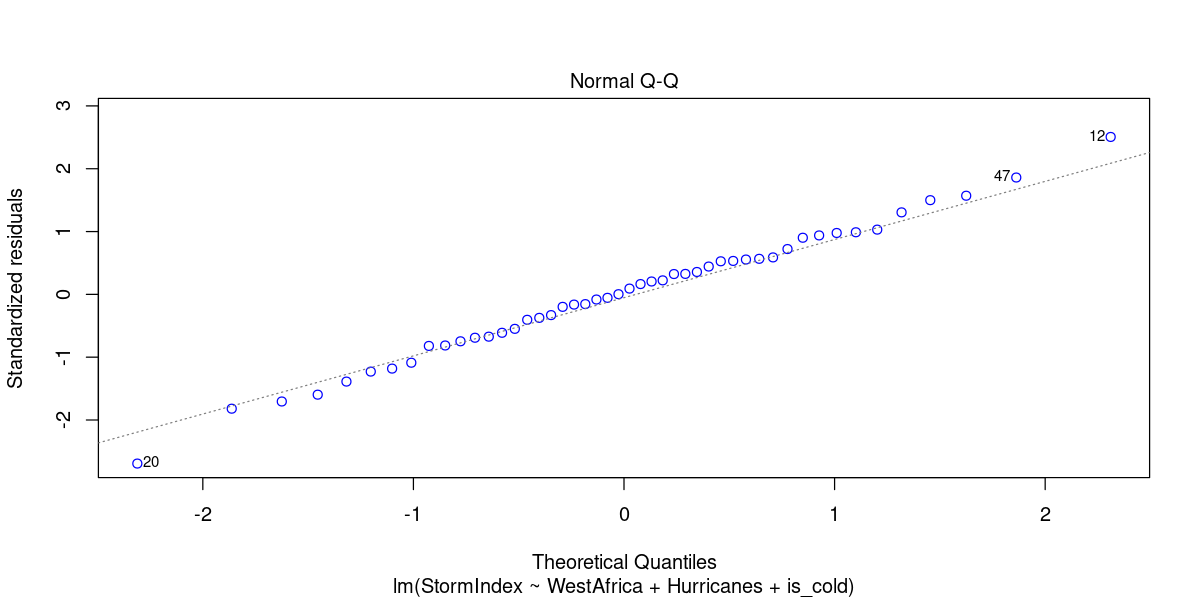

In [55]:
plot(fit_final, which=2, col=c("blue"))

Rezidua vskutku vypadají "normálně". Otestujeme tuto vlastnost testem z knihovny `olsrr`, který provádí tyto testy: Shapiro-Wilkůvm, Kolmogorov-Smirnovův, Cramer-von Misův a Anderson-Darlingův. Obecně pro tyto testy platí:
- $H_0:$ Data jsou výběrem z normálního rozdělení
- $H_A:$ Data nejsou výběřem z normálního rozdělení

In [56]:
ols_test_normality(fit_final)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9956         0.9997 
Kolmogorov-Smirnov        0.054          0.9977 
Cramer-von Mises          3.9408         0.0000 
Anderson-Darling          0.1177         0.9893 
-----------------------------------------------

Ve 3/4 testů normalitu reziduí nezamítáme, což je žádoucí.

### Homoskedasticita

Jelikož si počínáme s časovou řadou, má smysl se zabývat homoskedasticitou reziduí, tj. "jednotvárností" rozptylu reziduí.

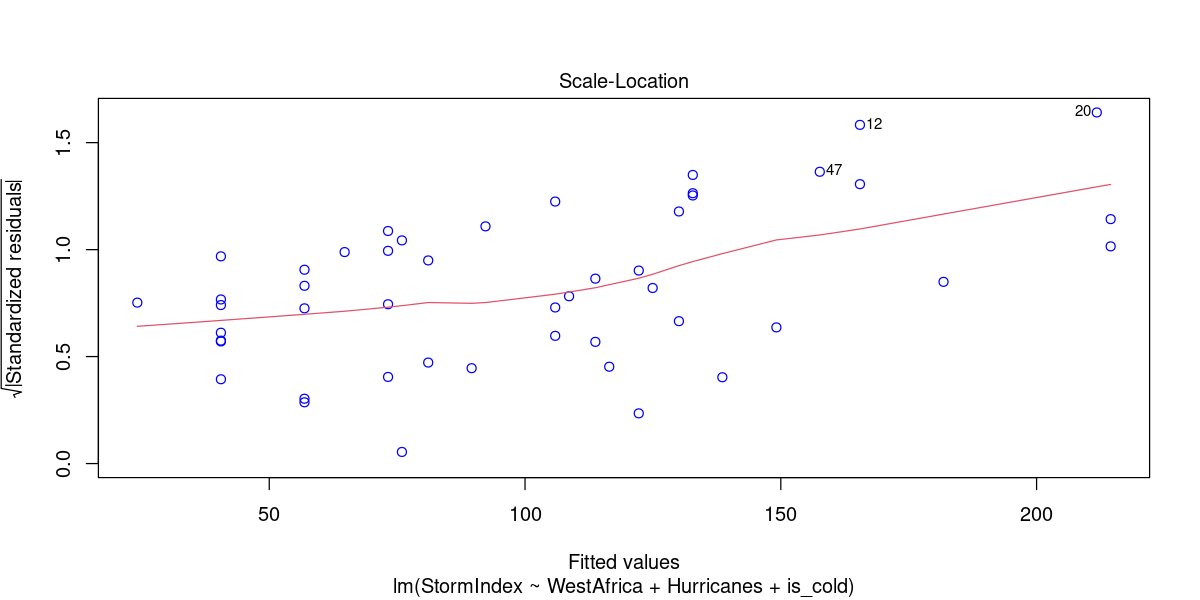

In [57]:
plot(fit_final, which=3, col=c("blue"))

Body jsou vcelku symetricky rozložené okolo červené křivky, data by tedy mohla být homoskedastická.

Tuto hypotézu otestujeme Breush Paganovým testem:

- $H_0:$ Data jsou homoskedastická
- $H_A:$ Data jsou heteroskedastická

In [58]:
ols_test_breusch_pagan(fit_final)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                 Data                  
 --------------------------------------
 Response : StormIndex 
 Variables: fitted values of StormIndex 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    13.84846 
 Prob > Chi2   =    0.0001981587 

Homoskedasticitu na standardní hladině spolehlivosti zamítáme. Variance reziduí tedy není konstantní.